# Import libraries and define some common attributes and matrixes

In [19]:
import numpy as np
np.random.seed(233)            #global random seed
import random
random.seed(233)
import matplotlib.pyplot as plt

a = 20       #dimension of the map
b = 15       #dimension of the map

smallnumber = 0                     # the lower limit on the map
bignumber = 10                      # the upper limit on the map
verybignumber = a * b * bignumber + 99999                      # a fake infinite number

environmentmap = np.random.randint(smallnumber, bignumber, size = (a, b))            #generate a random map
#environmentmap = np.array([[0,2,4,9],[7,1,2,2],[9,2,9,1],[1,5,9,9]])     #we can also set a map by hand

environmentmap[0, 0] = 0           #set the start point to be 0.
environmentmap[a-1, b-1] = 0      #set the end point to be 0

# Visualise the map

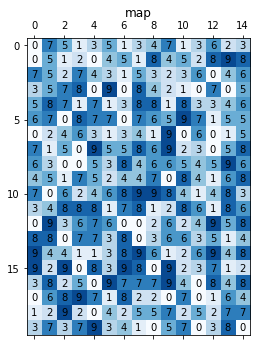

In [2]:
current_cmap = plt.cm.Blues
current_cmap.set_bad(color='red')
plt.matshow(environmentmap, cmap=plt.cm.Blues, vmin=0, vmax=10)
plt.title("map")
for i in range(a):
    for j in range(b):
      c = environmentmap[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

# Random move

the random route is: [[0, 0], [1, 0], [2, 0], [2, 1], [3, 1], [4, 1], [5, 1], [5, 2], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2], [10, 3], [11, 3], [11, 4], [11, 5], [12, 5], [13, 5], [13, 6], [13, 7], [14, 7], [14, 8], [14, 9], [15, 9], [15, 10], [15, 11], [15, 12], [16, 12], [16, 13], [17, 13], [18, 13], [19, 13], [19, 14]]


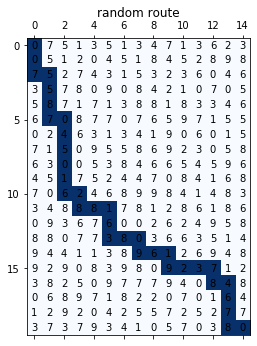

the length of random route is: 154


In [3]:
x = environmentmap.shape[0]
y = environmentmap.shape[1]

minborder = min(x,y)

tracklist_random = []
templocation = [0,0]
tracklist_random.append(templocation.copy())
while templocation[0] <= x-2 and templocation[1] <= y-2:          #when the bot does not reach the border
    dice = random.randint(0, 1)       #go x(x+1) if dice = 0, go y if dice = 1
    
    if dice == 0:
        templocation[0] += 1
        
    elif dice == 1:
        templocation[1] += 1

    tracklist_random.append(templocation.copy())

if tracklist_random[-1][0] == x-1:                    #if the robot touches the x border, it can only increase y.  #if 横坐标=19
    yremaining = y-1 - tracklist_random[-1][1]
    for i in range(yremaining):
        templocation[1] += 1
        tracklist_random.append(templocation.copy())
        
elif tracklist_random[-1][1] == y-1:                    #if the robot touches the y border, it can only increase x.
    xremaining = x-1 - tracklist_random[-1][0]
    for i in range(xremaining):
        templocation[0] += 1
        tracklist_random.append(templocation.copy())
    
print('the random route is:', tracklist_random)

#-------------------------------------------------------------------------------------------
#print and plot results
solutionmap = environmentmap.copy()

randomdistance = 0
for [i, j] in tracklist_random:         
    solutionmap[i, j] = verybignumber
    randomdistance += environmentmap[i, j]

plt.matshow(solutionmap, cmap=plt.cm.Blues, vmin=0, vmax=verybignumber)
plt.title("random route")
for i in range(a):
    for j in range(b):
      c = environmentmap[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

print('the length of random route is:', randomdistance)

## My algorithm
my algorithm is a slight improvement of random. When choosing to go right or go down, the robot does not ramdonmise but to choose the smaller one.

My algorithm route: [[0, 0], [1, 0], [1, 1], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2], [8, 2], [8, 3], [8, 4], [8, 5], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9], [10, 9], [11, 9], [12, 9], [12, 10], [12, 11], [13, 11], [13, 12], [13, 13], [14, 13], [15, 13], [15, 14], [16, 14], [17, 14], [18, 14], [19, 14]]


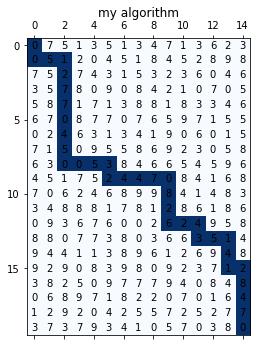

the length of my algorithm is: 113


In [4]:
x = environmentmap.shape[0]
y = environmentmap.shape[1]

minborder = min(x,y)

tracklist_myalgorithm = []
templocation = [0,0]
tracklist_myalgorithm.append(templocation.copy())
while templocation[0] <= x-2 and templocation[1] <= y-2:          #when the bot does not reach the border

    if environmentmap[templocation[0]+1, templocation[1]] <= environmentmap[templocation[0], templocation[1]+1]:
        templocation[0] += 1
        
    elif environmentmap[templocation[0]+1, templocation[1]] >= environmentmap[templocation[0], templocation[1]+1]:
        templocation[1] += 1

    tracklist_myalgorithm.append(templocation.copy())

if tracklist_myalgorithm[-1][0] == x-1:                    #if the robot touches the x border, it can only increase y.
    yremaining = y-1 - tracklist[-1][1]
    for i in range(yremaining):
        templocation[1] += 1
        tracklist_myalgorithm.append(templocation.copy())
        
elif tracklist_myalgorithm[-1][1] == y-1:                    #if the robot touches the y border, it can only increase x.
    xremaining = x-1 - tracklist_myalgorithm[-1][0]
    for i in range(xremaining):
        templocation[0] += 1
        tracklist_myalgorithm.append(templocation.copy())
        
print('My algorithm route:', tracklist_myalgorithm)

#------------------------------------------------------------------------------------------------------
#print and plot results
solutionmap = environmentmap.copy()

myalgorithmdistance = 0
for [i, j] in tracklist_myalgorithm:                                    #If we want to see different results, we change the tracklist here
    solutionmap[i, j] = verybignumber
    myalgorithmdistance += environmentmap[i, j]
    
plt.matshow(solutionmap, cmap=plt.cm.Blues, vmin=0, vmax=verybignumber)
plt.title("my algorithm")
for i in range(a):
    for j in range(b):
      c = environmentmap[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

print('the length of my algorithm is:', myalgorithmdistance)

# Dijkstra

Dijkstra route: [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [2, 5], [2, 6], [3, 6], [4, 6], [5, 6], [6, 6], [6, 5], [7, 5], [8, 5], [9, 5], [10, 5], [11, 5], [12, 5], [12, 6], [12, 7], [13, 7], [13, 8], [13, 9], [14, 9], [14, 10], [15, 10], [15, 11], [16, 11], [17, 11], [17, 12], [18, 12], [19, 12], [19, 13], [19, 14]]


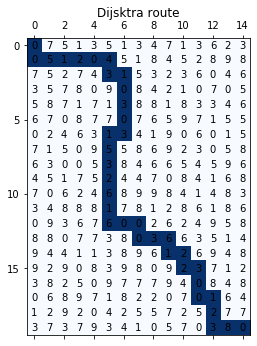

the length of this dijkstra algorithm is: 77


In [20]:
# The first thing I do is to set some axillary lists

#first axillary list, labelled or not
is_labelled = np.zeros(shape = (a, b), dtype = 'bool')

#second axillary list, distance from the start point
distance = np.empty(shape = (a, b), dtype = 'int')
for i in range(a):
    for j in range(b):
        distance[i, j] = verybignumber                        #set the initial distance number in this set to be a very big number
distance[0, 0] = 0

#third (and fourth) list, The previsous location. We could use one list to do this, but to make it easy, I use to
lastcelly = np.zeros(shape = (a, b), dtype = 'int')
lastcellx = np.zeros(shape = (a, b), dtype = 'int')

#-----------------------------------------------------------------------------------------------

#set some helper functions
#check if all cells are labelled. Keep running this program if not. Until all cells labelled.
def whether_all_cells_labelled(labelarray):
    Labell_or_not = True
    for i in range(a):
        for j in range(b):
            if is_labelled[i, j] == False:
                Labell_or_not = False
    return Labell_or_not

#find the smallest cell in all unlabelled cells
#before that we should first set the labelled ones to be infinite in another array
def find_smallest_in_array(array1):
#first replace all labelled cells with infinite(very big number)
    array2 = array1.copy()
    for i in range(a):
        for j in range(b):
            if is_labelled[i, j] == True:
                array2[i, j] = verybignumber

#find the smallest number in the distance array and its location. If more than one, then just the first one.
    smallestnumber = array2[0, 0]
    smallestx = 0
    smallesty = 0
    for i in range (a):
        for j in range (b):
            if array2[i,j] < smallestnumber:
                smallestnumber = array2[i,j]
                smallestx = i
                smallesty = j

    return smallestx, smallesty

#------------------------------------------------------------------------------------------------

#start dijkstra
#while not all cells labelled, do this until all cells labelled.
while whether_all_cells_labelled(is_labelled) == False:

    #search the nearby of the smallest cell. From the current smallest go to them. 
    #if distance smaller than current, update it.
    
    x, y = find_smallest_in_array(distance)                                    #find the currently smallest number in all unlabelled

    for [i, j] in ([x-1, y], [x+1, y], [x, y-1], [x, y+1]):                     #for the near cells
        if 0 <= i and i <= a-1 and 0<=j and j<=b-1:                             #for the near cells that are within the map border
            newdistance = distance[x, y] + environmentmap[i, j]                 #calculate the new distance
            if newdistance < distance[i, j]:                                     #if the distance of new route is better
                distance[i, j] = newdistance                                    #updata distance

                lastcellx[i, j] = x                                             #updata the previous cell
                lastcelly[i, j] = y

        is_labelled[x, y] = True                                              #mark it as labelled

#backtrack from the end point to get the tracklist
tracklist = []
i = a-1
j = b-1
while i !=0 or j != 0:
    point = [i, j]
    tracklist.insert(0, [i, j])
    i = lastcellx[point[0], point[1]]
    j = lastcelly[point[0], point[1]]
tracklist.insert(0, [0, 0])

tracklist_dijkstra = tracklist.copy()
print('Dijkstra route:', tracklist)

#-------------------------------------------------------------------------------------------------
#print and plot results

solutionmap = environmentmap.copy()

dijkstradistance = 0
for [i, j] in tracklist_dijkstra:            
    solutionmap[i, j] = verybignumber                       #create a 'solution map' to show color difference
    dijkstradistance += environmentmap[i, j]

plt.matshow(solutionmap, cmap=plt.cm.Blues, vmin=0, vmax=verybignumber)
plt.title("Dijsktra route")
for i in range(a):
    for j in range(b):
      c = environmentmap[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

print('the length of this dijkstra algorithm is:', dijkstradistance)

# Test the performance of Dijkstra based on grid size and value distribution

First pack the Dijkstra algorithm into a function. Here we do not need the graphs, we just need to output the distance value
Also we do not use a fixed random seed here because we need to run this many times to avoid Random error
If the first cell has already been run please reopen this file and directly run this cell because cell 1 has global random seeds.

In [3]:
import numpy as np
verybignumber = 99999999

def dijkstra(environmentmap, figurename):                             #input is the map and the name of the result figure. others all same
    a = environmentmap.shape[0]
    b = environmentmap.shape[1]
    
    is_labelled = np.zeros(shape = (a, b), dtype = 'bool')

    distance = np.empty(shape = (a, b), dtype = 'int')
    for i in range(a):
        for j in range(b):
            distance[i, j] = verybignumber    
    distance[0, 0] = 0

    lastcelly = np.zeros(shape = (a, b), dtype = 'int')
    lastcellx = np.zeros(shape = (a, b), dtype = 'int')

    def whether_all_cells_labelled(labelarray):
        Labell_or_not = True
        for i in range(a):
            for j in range(b):
                if is_labelled[i, j] == False:
                    Labell_or_not = False
        return Labell_or_not

    def find_smallest_in_array(array1):
        array2 = array1.copy()
        for i in range(a):
            for j in range(b):
                if is_labelled[i, j] == True:
                    array2[i, j] = verybignumber

        smallestnumber = array2[0, 0]
        smallestx = 0
        smallesty = 0
        for i in range (a):
            for j in range (b):
                if array2[i,j] < smallestnumber:
                    smallestnumber = array2[i,j]
                    smallestx = i
                    smallesty = j
        return smallestx, smallesty

    while whether_all_cells_labelled(is_labelled) == False:

        x, y = find_smallest_in_array(distance)

        for [i, j] in ([x-1, y], [x+1, y], [x, y-1], [x, y+1]):
            if 0 <= i and i <= a-1 and 0<=j and j<=b-1:
                newdistance = distance[x, y] + environmentmap[i, j]
                if newdistance < distance[i, j]:
                    distance[i, j] = newdistance
                    lastcellx[i, j] = x
                    lastcelly[i, j] = y
            is_labelled[x, y] = True

    tracklist = []
    i = a-1
    j = b-1
    while i !=0 or j != 0:
        point = [i, j]
        tracklist.insert(0, [i, j])
        i = lastcellx[point[0], point[1]]
        j = lastcelly[point[0], point[1]]
    tracklist.insert(0, [0, 0])

    tracklist_dijkstra = tracklist.copy()
    #print('Dijkstra route:', tracklist)
    
    #solutionmap = environmentmap.copy()

    dijkstradistance = 0
    for [i, j] in tracklist_dijkstra:            
        #solutionmap[i, j] = verybignumber
        dijkstradistance += environmentmap[i, j]

    #print('the length of this dijkstra algorithm is:', dijkstradistance)
    
    return dijkstradistance

Test if it is dependent on cell value distribution. Use time library to record time consumption. Run Dijkstra on every grid 1000 times to calsulate the average computing time and shortest distance.

In [6]:
import time
totoltime = 0
totallength = 0
for i in range(1000):
    environmentmap1 = np.random.randint(0, 10, size = (4, 4))  
    time_start = time.clock()
    distance = dijkstra(environmentmap1, 'test on other grids')
    time_end = time.clock()
    time_sum = time_end - time_start
    totoltime = totoltime + time_sum
    totallength = totallength + distance
print('4*4 grid, cell value 0-9', 'computing time:', totoltime/1000, 'distance:', totallength/1000)

totoltime = 0
totallength = 0
for i in range(1000):
    environmentmap1 = np.random.randint(0, 100, size = (4, 4))  
    time_start = time.clock()
    distance = dijkstra(environmentmap1, 'test on other grids')
    time_end = time.clock()
    time_sum = time_end - time_start
    totoltime = totoltime + time_sum
    totallength = totallength + distance
print('4*4 grid, cell value 0-99', 'computing time:', totoltime/1000, 'distance:', totallength/1000)

4*4 grid, cell value 0-9 computing time: 0.0008617213999998227 distance: 22.914
4*4 grid, cell value 0-99 computing time: 0.0008580083999997612 distance: 261.18


We can see that the cell value distribution does not influnce the computing time.
The distance will increase with the values on the cells.

Next test the relationship of grid shape. Both three grids have 36 cells. but their shapes are relatively 6*6, 4*9 and 3*12.

In [7]:
import time
totoltime = 0
totallength = 0
for i in range(1000):
    environmentmap1 = np.random.randint(0, 10, size = (6, 6))  
    time_start = time.clock()
    distance = dijkstra(environmentmap1, 'test on other grids')
    time_end = time.clock()
    time_sum = time_end - time_start
    totoltime = totoltime + time_sum
    totallength = totallength + distance
print('6*6 grid, cell value 0-9', 'computing time:', totoltime/1000, 'distance:', totallength/1000)

totoltime = 0
totallength = 0
for i in range(1000):
    environmentmap1 = np.random.randint(0, 10, size = (4, 9))  
    time_start = time.clock()
    distance = dijkstra(environmentmap1, 'test on other grids')
    time_end = time.clock()
    time_sum = time_end - time_start
    totoltime = totoltime + time_sum
    totallength = totallength + distance
print('4*9 grid, cell value 0-9', 'computing time:', totoltime/1000, 'distance:', totallength/1000)

totoltime = 0
totallength = 0
for i in range(1000):
    environmentmap1 = np.random.randint(0, 10, size = (3, 12))  
    time_start = time.clock()
    distance = dijkstra(environmentmap1, 'test on other grids')
    time_end = time.clock()
    time_sum = time_end - time_start
    totoltime = totoltime + time_sum
    totallength = totallength + distance
print('3*12 grid, cell value 0-9', 'computing time:', totoltime/1000, 'distance:', totallength/1000)

6*6 grid, cell value 0-9 computing time: 0.003766393699997593 distance: 33.392
4*9 grid, cell value 0-9 computing time: 0.003689000800002077 distance: 38.181
3*12 grid, cell value 0-9 computing time: 0.003616481900001759 distance: 47.661


We can find that for the grids with the same sizes, although the difference is not obvois, but flat girds takes a little less more computing time but longer distance.

Then look at the relationship with side length and square. We tested it on grids from 3*3 to 16*16 and drew a graph.

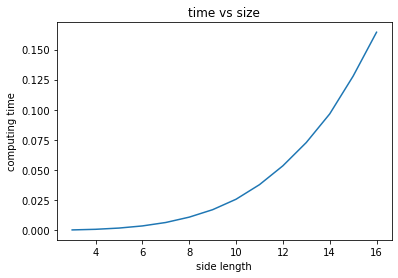

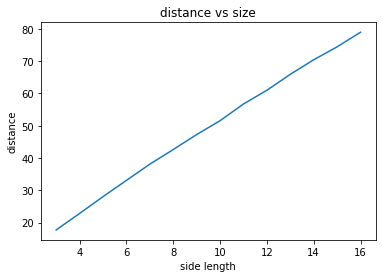

In [13]:
import time
import matplotlib.pyplot as plt

totoltime = 0
totallength = 0

sidelengthlist = []
timelist = []
distancelist = []

for sidelength in range(3, 17):
    
    for i in range(1000):
        environmentmap1 = np.random.randint(0, 10, size = (sidelength, sidelength))  
        time_start = time.clock()
        distance = dijkstra(environmentmap1, 'test on other grids')
        time_end = time.clock()
        time_sum = time_end - time_start
        totoltime = totoltime + time_sum
        totallength = totallength + distance
    sidelengthlist.append(sidelength)
    timelist.append(totoltime/1000)
    distancelist.append(totallength/1000)
    totoltime = 0
    totallength = 0        

squarelist = [i*i for i in sidelengthlist]
    
plt.plot(sidelengthlist, timelist)
plt.xlabel("side length")
plt.ylabel("computing time")
plt.title("time vs border length")
plt.show()

plt.plot(sidelengthlist, timelist)
plt.xlabel("side length")
plt.ylabel("computing time")
plt.title("time vs square")
plt.show()

plt.plot(sidelengthlist, distancelist)
plt.xlabel("side length")
plt.ylabel("distance")
plt.title("distance vs border length")
plt.show()


From the cureves we assume that the relationship of time and border length is 指数级的， however linear with suqare. The relationship of distance and sidelength is linear.

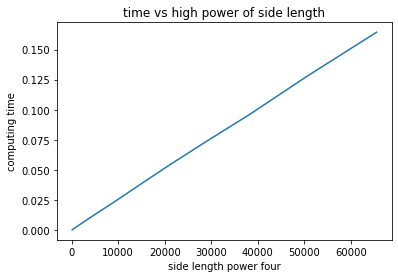

In [18]:
squarelist = [i*i*i*i for i in sidelengthlist]
plt.plot(squarelist, timelist)
plt.xlabel("side length power four")
plt.ylabel("computing time")
plt.title("time vs high power of side length")
plt.show()

We can guess from the graph that computing time has a linear lationship with the high power of border length. Since there is no strict mathematical proof, we cannot judge the specific value. 

# Test Dijkstra on other maps
Here try the Dijkstra algorithm on some other maps. 
First still pack Dijkstra as a function

In [6]:
def dijkstra(environmentmap, figurename):                             #input is the map and the name of the result figure. others all same
    a = environmentmap.shape[0]
    b = environmentmap.shape[1]
    
    is_labelled = np.zeros(shape = (a, b), dtype = 'bool')

    distance = np.empty(shape = (a, b), dtype = 'int')
    for i in range(a):
        for j in range(b):
            distance[i, j] = verybignumber    
    distance[0, 0] = 0

    lastcelly = np.zeros(shape = (a, b), dtype = 'int')
    lastcellx = np.zeros(shape = (a, b), dtype = 'int')

    def whether_all_cells_labelled(labelarray):
        Labell_or_not = True
        for i in range(a):
            for j in range(b):
                if is_labelled[i, j] == False:
                    Labell_or_not = False
        return Labell_or_not

    def find_smallest_in_array(array1):
        array2 = array1.copy()
        for i in range(a):
            for j in range(b):
                if is_labelled[i, j] == True:
                    array2[i, j] = verybignumber

        smallestnumber = array2[0, 0]
        smallestx = 0
        smallesty = 0
        for i in range (a):
            for j in range (b):
                if array2[i,j] < smallestnumber:
                    smallestnumber = array2[i,j]
                    smallestx = i
                    smallesty = j
        return smallestx, smallesty

    while whether_all_cells_labelled(is_labelled) == False:

        x, y = find_smallest_in_array(distance)

        for [i, j] in ([x-1, y], [x+1, y], [x, y-1], [x, y+1]):
            if 0 <= i and i <= a-1 and 0<=j and j<=b-1:
                newdistance = distance[x, y] + environmentmap[i, j]
                if newdistance < distance[i, j]:
                    distance[i, j] = newdistance
                    lastcellx[i, j] = x
                    lastcelly[i, j] = y
            is_labelled[x, y] = True

    tracklist = []
    i = a-1
    j = b-1
    while i !=0 or j != 0:
        point = [i, j]
        tracklist.insert(0, [i, j])
        i = lastcellx[point[0], point[1]]
        j = lastcelly[point[0], point[1]]
    tracklist.insert(0, [0, 0])

    tracklist_dijkstra = tracklist.copy()
    print('Dijkstra route:', tracklist)

    solutionmap = environmentmap.copy()

    dijkstradistance = 0
    for [i, j] in tracklist_dijkstra:            
        solutionmap[i, j] = verybignumber
        dijkstradistance += environmentmap[i, j]

    plt.matshow(solutionmap, cmap=plt.cm.Blues, vmin=0, vmax=verybignumber)
    plt.title(figurename)
    for i in range(a):
        for j in range(b):
          c = environmentmap[i,j]
          plt.text(j, i, str(c), va='center', ha='center')
    plt.show()

    print('the length of this dijkstra algorithm is:', dijkstradistance)
    
    #return tracklist_dijkstra

# A test to see if Dijkstra algorithm still works on big and small maps
We can see that it both works on big and small maps.

Dijkstra route: [[0, 0], [1, 0], [2, 0], [2, 1], [3, 1], [3, 2], [4, 2]]


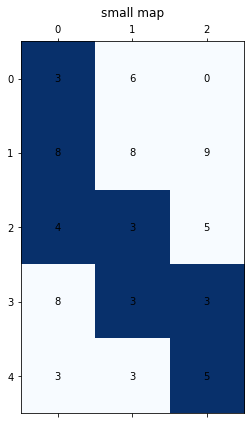

the length of this dijkstra algorithm is: 29


In [7]:
environmentmap1 = np.random.randint(0, 10, size = (5, 3))               #on a 5*3 small map
dijkstra(environmentmap1, 'test on a small map')

Dijkstra route: [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [1, 10], [1, 11], [1, 12], [1, 13], [2, 13], [2, 14], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [4, 19], [5, 19], [5, 20], [6, 20], [7, 20], [8, 20], [9, 20], [9, 19], [10, 19], [11, 19], [11, 20], [12, 20], [13, 20], [14, 20], [14, 21], [14, 22], [15, 22], [15, 23], [15, 24], [16, 24], [17, 24], [17, 23], [18, 23], [19, 23], [20, 23], [21, 23], [21, 24], [22, 24], [23, 24], [24, 24], [25, 24], [26, 24], [26, 25], [27, 25], [27, 26], [28, 26], [29, 26], [30, 26], [31, 26], [32, 26], [33, 26], [34, 26], [34, 27], [35, 27], [35, 28], [36, 28], [37, 28], [38, 28], [39, 28], [40, 28], [41, 28], [42, 28], [43, 28], [44, 28], [44, 29], [45, 29], [46, 29], [47, 29], [48, 29], [49, 29]]


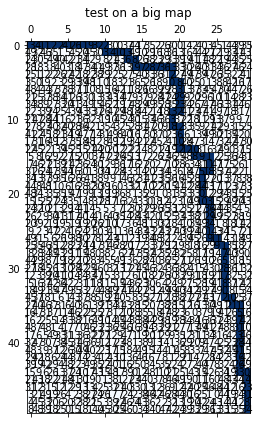

the length of this dijkstra algorithm is: 1119


In [9]:
environmentmap2 = np.random.randint(0, 50, size = (50, 30))            #on a 50*30 grid, value on cells from 0- 50
dijkstra(environmentmap2, 'test on a big map')

# A test to see if it still works on certain difficult maps# 

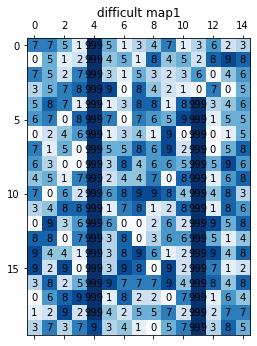

In [21]:
np.random.seed(233)
a = 20
b = 15
environmentmap3 = np.random.randint(smallnumber, bignumber, size = (a, b))            #generate a random map

for i in range(0, 19):                           #Create 'mountains'
    environmentmap3[i, 4] = 999
for i in range(4, 20):
    environmentmap3[i, 11] = 999

#Visualise the map
current_cmap = plt.cm.Blues
current_cmap.set_bad(color='red')
plt.matshow(environmentmap3, cmap=plt.cm.Blues, vmin=0, vmax=10)
plt.title("difficult map1")
for i in range(a):
    for j in range(b):
      c = environmentmap3[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

Dijkstra route: [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [6, 1], [7, 1], [8, 1], [8, 2], [9, 2], [10, 2], [11, 2], [12, 2], [13, 2], [14, 2], [14, 3], [15, 3], [16, 3], [17, 3], [18, 3], [19, 3], [19, 4], [19, 5], [18, 5], [17, 5], [16, 5], [15, 5], [14, 5], [13, 5], [12, 5], [11, 5], [10, 5], [9, 5], [8, 5], [7, 5], [6, 5], [6, 6], [5, 6], [4, 6], [3, 6], [2, 6], [2, 7], [2, 8], [2, 9], [3, 9], [3, 10], [3, 11], [3, 12], [4, 12], [5, 12], [6, 12], [7, 12], [8, 12], [9, 12], [10, 12], [11, 12], [11, 13], [12, 13], [13, 13], [14, 13], [15, 13], [15, 14], [16, 14], [17, 14], [18, 14], [19, 14]]


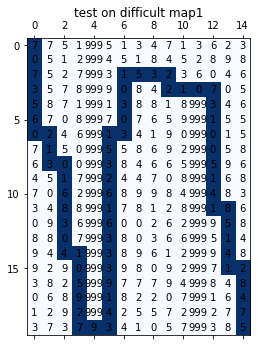

the length of this dijkstra algorithm is: 226


In [15]:
dijkstra(environmentmap3, 'test on difficult map1')

# Test on another difficult map
Here I made the 'mountains lower', and our algorithm is not absorbed in avoiding mountains. It found that in this map climbing one of the mountains is a better idea.

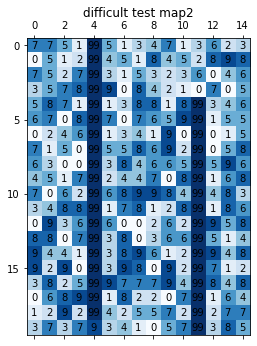

In [16]:
np.random.seed(233)
a = 20
b = 15
environmentmap4 = np.random.randint(smallnumber, bignumber, size = (a, b))            #generate a random map

for i in range(0, 19):                       #create 'mountains' on the map
    environmentmap4[i, 4] = 99
for i in range(4, 20):
    environmentmap4[i, 11] = 99

#Visualise the map
current_cmap = plt.cm.Blues
current_cmap.set_bad(color='red')
plt.matshow(environmentmap4, cmap=plt.cm.Blues, vmin=0, vmax=10)
plt.title("difficult map2")
for i in range(a):
    for j in range(b):
      c = environmentmap4[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

Dijkstra route: [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 9], [3, 10], [3, 11], [3, 12], [4, 12], [5, 12], [6, 12], [7, 12], [8, 12], [9, 12], [10, 12], [11, 12], [11, 13], [12, 13], [13, 13], [14, 13], [15, 13], [15, 14], [16, 14], [17, 14], [18, 14], [19, 14]]


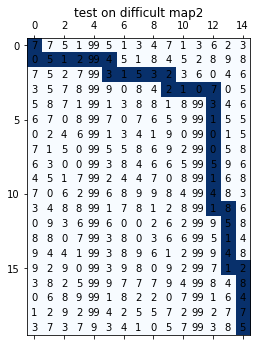

the length of this dijkstra algorithm is: 202


In [17]:
dijkstra(environmentmap4, 'test on difficult map2')